In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

# Read the CSV file from the URL and store it in a DataFrame
df = pd.read_csv(url)

# Print the first few rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df[20:30]

,sepal_length,sepal_width,petal_length,petal_width,species
20,5.4,3.4,1.7,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
22,4.6,3.6,1.0,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
24,4.8,3.4,1.9,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa


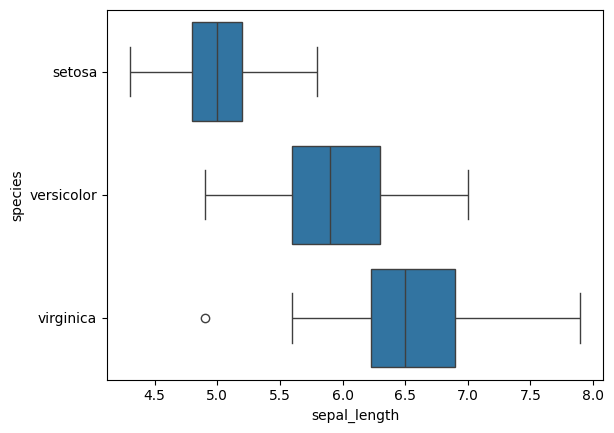

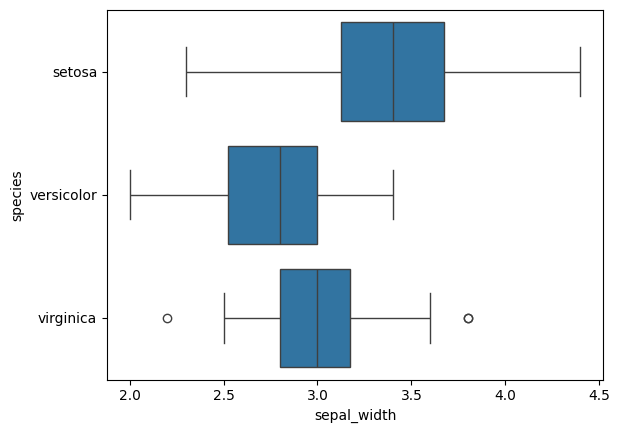

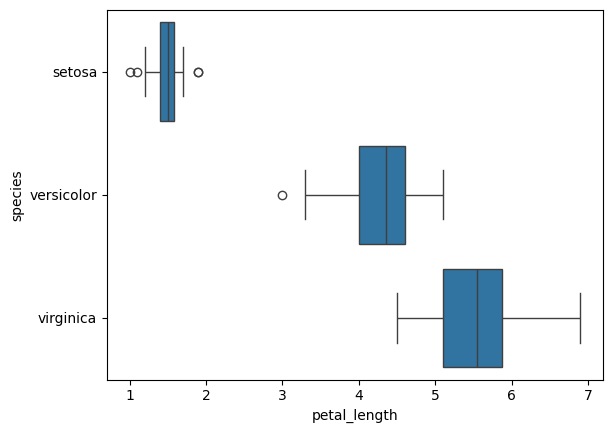

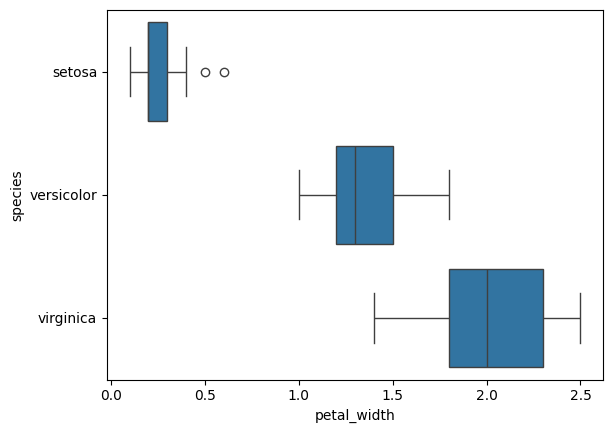

In [12]:
sns.boxplot(y=df["species"], x=df['sepal_length'])
plt.show()
sns.boxplot(y=df["species"], x=df['sepal_width'])
plt.show()
sns.boxplot(y=df["species"], x=df['petal_length'])
plt.show()
sns.boxplot(y=df["species"], x=df['petal_width'])
plt.show()

In [13]:
X=df.drop(columns=['species'])
Y=df['species']

In [14]:
from sklearn.model_selection import train_test_split
# Assuming X contains the features and Y contains the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[-0.02627732, -1.00581738,  0.13088974,  0.01104976],
       [-0.87523698,  1.12414884, -1.34873339, -1.31492114],
       [-0.75395703,  1.12414884, -1.29182481, -1.31492114],
       [-1.11779688,  0.17749719, -1.29182481, -1.44751823],
       [-0.51139713,  2.0708005 , -1.40564197, -1.04972696],
       [-0.26883722, -0.53249156,  0.64306697,  1.07182648],
       [-0.99651693, -1.71580613, -0.26747033, -0.25414442],
       [ 0.94396229, -0.29582864,  0.47234123,  0.14364685],
       [-0.99651693,  0.65082301, -1.34873339, -1.31492114],
       [ 0.58012243, -1.2424803 ,  0.69997556,  0.93922939],
       [ 0.58012243,  0.65082301,  1.26906137,  1.73481193],
       [ 2.27804175, -0.53249156,  1.66742145,  1.07182648],
       [-0.39011718, -1.47914321,  0.01707257, -0.12154733],
       [-1.48163674,  0.4141601 , -1.34873339, -1.31492114],
       [-1.72419664,  0.4141601 , -1.40564197, -1.31492114],
       [-0.87523698,  0.88748593, -1.29182481, -1.31492114],
       [-0.87523698, -1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifer = KNeighborsClassifier(n_neighbors = 7)
classifer.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
y_pred = classifer.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [19]:
from sklearn import neighbors
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,10):
  clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='weighted')
  # Append F1 score and value of k to respective lists
  f1_list.append(f1)
  k_list.append(k)

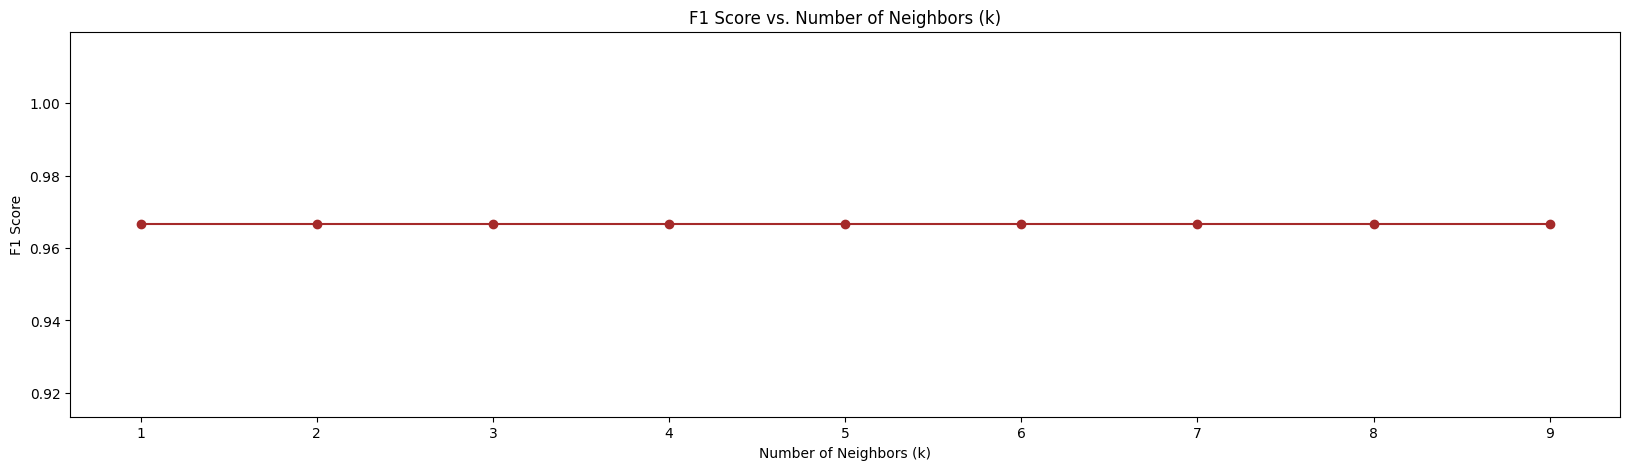

In [20]:
plt.figure(figsize=(20,5))
plt.plot(k_list, f1_list,marker='o',color='brown')
plt.title('F1 Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.show()

In [21]:
best_f1_score=max(f1_list)
best_k = k_list[f1_list.index(best_f1_score)]
print("Optimum K value", best_k)
print("Corresponding value of F1 score:", best_f1_score)

Optimum K value 1
Corresponding value of F1 score: 0.9665831244778613


In [22]:
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
KNN_model.fit(X_train,y_train)
y_new_pred=KNN_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_new_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_new_pred))

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_new_pred))

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
from sklearn.metrics import euclidean_distances

# Calculate the Euclidean distances between corresponding rows in X_train and X_test
distances = euclidean_distances(X_test, X_train)

# Print the distances
for i in range(len(X_test)):
    print(distances[i])

[1.3114877  4.04722127 3.92173431 4.0348482  4.05215992 1.3453624
 2.42899156 0.31622777 4.0607881  0.79372539 1.77482393 2.18632111
 1.71464282 4.24264069 4.42831797 3.94715087 2.51197134 1.47648231
 1.         1.2489996  0.45825757 0.42426407 1.83030052 1.55884573
 1.08166538 0.9486833  0.8660254  0.72111026 4.3324358  4.35889894
 1.30384048 0.81853528 3.68239053 1.13578167 1.40712473 2.39374184
 4.0348482  4.08044115 1.5        1.55884573 4.15812458 1.34164079
 3.88587185 4.1        0.81853528 0.6        4.08044115 4.65510472
 0.64807407 4.10365691 4.23910368 1.28840987 0.59160798 4.14608249
 1.25698051 1.79443584 1.63401346 1.04880885 1.26095202 1.12249722
 0.79372539 1.02956301 1.36381817 3.98371686 3.94588393 0.48989795
 2.463737   0.71414284 3.71214224 1.33041347 0.34641016 1.38564065
 1.06301458 1.96977156 0.88317609 1.3190906  3.86781592 3.9987498
 1.06301458 4.1024383  1.50996689 0.37416574 3.82230297 4.01870626
 3.76961536 0.88317609 1.161895   3.99124041 0.83666003 1.838477

In [25]:
from sklearn import neighbors
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,10):
  clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
  clf.fit(X_train,y_train)
  pred=clf.predict(X_test)
  f=f1_score(y_test,pred,average='macro')
  f1_list.append(f)
  k_list.append(k)

Text(0, 0.5, 'f1 score')

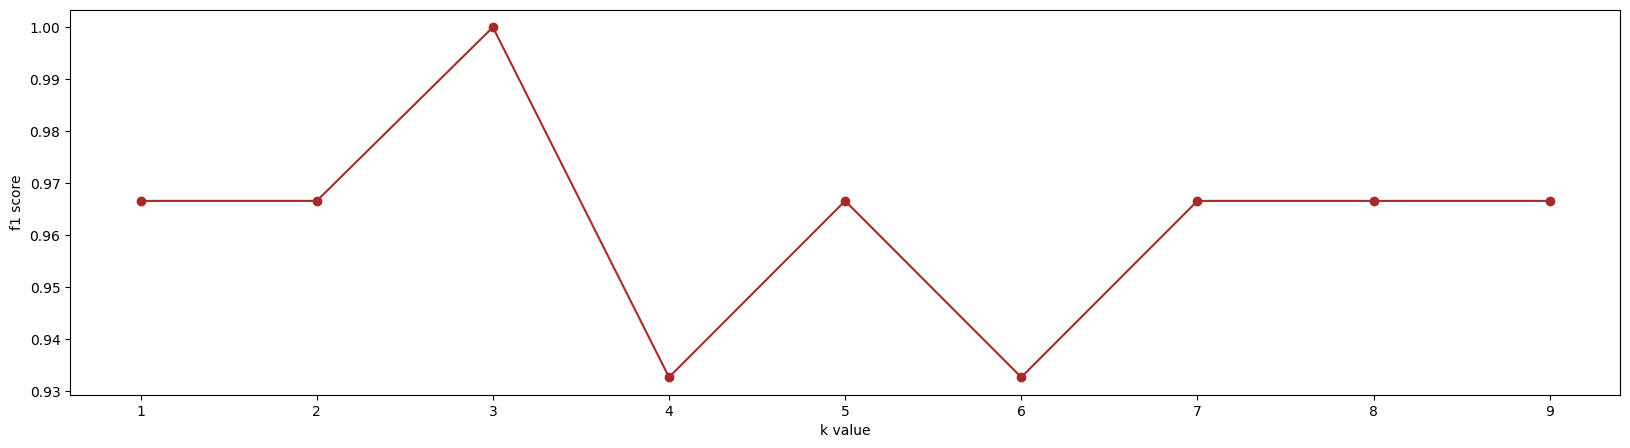

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(k_list,f1_list,marker='o',color='brown')
plt.xlabel("k value")
plt.ylabel("f1 score")

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
newresult = confusion_matrix(y_test, y_new_pred)
print("Confusion Matrix:")
print(newresult)
newresult1 = classification_report(y_test,y_new_pred)
print("Classification Report:",)
print(newresult1)
newresult2 = accuracy_score(y_test,y_new_pred)
print("Accuracy:",newresult2)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [1]:
def euclidean_distances(X_test, X_train):
  X_test = np.array(X_test)
  X_train = np.array(X_train)
  distanaces = np.zeros(len(X_test), len(X_train))
  for i, test_point in enumerate(X_test):
    distances[i] = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))